<a href="https://colab.research.google.com/github/rachel0614/BDA-Project1/blob/develop/WIP_CA_5_Scalable_Distributed_Machine_Learning_Spark_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Warning*: Distribution/sharing of this notebook and other lab notebooks on the internet and other sources is strictly prohibited. You should not provide this notebook to anyone else. you should just use it for the purpose of this assessment only.

You should attempt and submit your work. you can refer to sources/APIs to complete this taks. Copying from each other even a part or so is strictly prohibited and may result in serious action.


# Assessment 5 : Big Data Analytics using Machine Learning
## Due Feburary 25th, 5pm (Firm)
### Total points: 100 ( weighted over 35)

This assessmet will enable you achieve essential experience of machine learning using sklearn and scalable approach to machine learning based on park ML! 

The focus of this assessment is to explore what makes videos popular on various platforms, e.g., Netflix and YouTube. The assessment will focus on YouTube 's data.

**PLEASE NOTE** There can be multiple solutions possible for this assessment. various students will end up implementing different solutions. Therefore, there is not a single solution to fit all students.

### Required Libraries 
Setup the libraries using the following cells. You should select Java 8 when prompted.

In [5]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
0 upgraded, 15 newly installed, 0 to remove and 13 not upgraded.
Need to get 43.5 MB of archives.
After this 

In [6]:
!pip3 install pandas==1.0.5

     |████████████████████████████████| 10.1MB 8.9MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.0.5 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [1]:
# if restart of runtime is successful, the execution of this cell should
# prints True
import pandas as pd
print(pd.__version__ == '1.0.5')

True


In [3]:
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os

In [4]:
from google_drive_downloader import GoogleDriveDownloader as gdd
#https://drive.google.com/file/d/1BOWMkG9wmgtjpwGhiCoQHRe-ZM7MeeZQ/view?usp=sharing
# Glass data from https://archive.ics.uci.edu/ml/machine-learning-databases/glass/
gdd.download_file_from_google_drive(file_id='1BOWMkG9wmgtjpwGhiCoQHRe-ZM7MeeZQ',
                                    dest_path='/content/youtube_data.zip')

In [5]:
!unzip /content/youtube_data.zip

Archive:  /content/youtube_data.zip
   creating: youtube_data/
  inflating: youtube_data/IN_category_id.json  
   creating: __MACOSX/
   creating: __MACOSX/youtube_data/
  inflating: __MACOSX/youtube_data/._IN_category_id.json  
  inflating: youtube_data/.DS_Store  
  inflating: __MACOSX/youtube_data/._.DS_Store  
  inflating: youtube_data/FR_category_id.json  
  inflating: __MACOSX/youtube_data/._FR_category_id.json  
  inflating: youtube_data/INvideos.csv  
  inflating: __MACOSX/youtube_data/._INvideos.csv  
  inflating: youtube_data/CAvideos.csv  
  inflating: __MACOSX/youtube_data/._CAvideos.csv  
  inflating: youtube_data/FRvideos.csv  
  inflating: __MACOSX/youtube_data/._FRvideos.csv  
  inflating: youtube_data/CA_category_id.json  
  inflating: __MACOSX/youtube_data/._CA_category_id.json  
  inflating: youtube_data/US_category_id.json  
  inflating: __MACOSX/youtube_data/._US_category_id.json  
  inflating: youtube_data/USvideos.csv  
  inflating: __MACOSX/youtube_data/._USvide

Import your dataset using the following cells for the Youtube videos

# Section 5.1. : Machine Learning with Sklearn (45 points)

## 5.1.1 Data loading and Preprocessing (5 pts)

The dataset consists of a daily record of the top trending YouTube videos.

To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions, e.g., number of views, shares, comments and likes. "Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously viral “[Gangnam Style](https://www.youtube.com/watch?v=9bZkp7q19f0)”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for numerous countries, with up to 200 listed trending videos per day.

Each region’s data is in a separate file. Data includes:

*   Video Title
*   Channel title
*   Publish time
*   Tags
*   Views
*   Likes
*   Dislikes
*   Description
*   Comment count

The data also includes a category\_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.

For more information on specific columns in the dataset refer to the column metadata.



#### 5.1.1.1: Combining Multiple CSV's. (2 pts.)

There are multiple csv files in the dataset, each corresponding to a specific country. As a first step you need to read them and combine these csv files into a single dataframe. Use 'video_id' as your index.

While combining them, you also need to create a column for "country" and fill it in the final dataframe. The country name can be extracted using the filename itself.

Name your dataframe "combined_data".

In [6]:
import pathlib

# Import all the csv files
files = [i for i in glob.glob('/content/youtube_data/*.csv'.format('csv'))]
sorted(files)

# Task: Merge all dataframes to single dataframe "combined_data" and add a 'country' column. 
all_dataframes = list()
for csv in files:
  #read csv and append country column with value of the left 2 letters of the current file name
  all_dataframes.append(pd.read_csv(csv).assign(country=pathlib.Path(csv).name[:2]))
combined_data = pd.concat(all_dataframes)


#### 5.1.1.2: Map category Id's to categories (2 pts)

Read the category_id.json file and map the category_id's in the dataframe to the category name.

Use json.load to read in the data in the json file as a python dictionary and then map the category id given in the dataframe to category name from the json file. (Hint: the US json is likely the most comprehensive reference)




In [7]:
combined_data['category_id'] = combined_data['category_id'].astype(str)

# Add code here
#read json files, parse the id and snippet-title as the key and value of the dict to get the intersection of categroies dict
dict_categories = {}
files = [i for i in glob.glob('/content/youtube_data/*.json'.format('json'))]
for f in files:
  #file prefix is country code
  country = pathlib.Path(f).name[:2]
  with open(f,'r') as data:
    json_data = json.load(data)
    #item list
    list_item = json_data['items']
    #put items into dict_categories
    for item in list_item:
      dict_categories[item['id']] = str(item['snippet']['title'])
#https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict  
#generate category by mapping category_id from category dict to name
combined_data.insert(4, 'category',combined_data['category_id'].map(dict_categories))

In [ ]:
combined_data.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category                  object
category_id               object
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
country                   object
dtype: object

#### 5.1.1.3: Fix datetime format and remove rows with NA's (1 pt)

The 'publish_time' and 'trending_date' features are not in a unix datetime format, so use pandas to_datetime() to convert it into the right format.

After that is done remove all the rows which have NA's in them.

In [8]:
# Add code here
combined_data['trending_date'] = pd.to_datetime(combined_data['trending_date'],format="%y.%d.%m")
combined_data['publish_time'] = pd.to_datetime(combined_data['publish_time'])

# Add your Code here to remove NA's
combined_data = combined_data.dropna()

In [9]:
# print
print('validate_na',(combined_data.shape))

validate_na (154567, 18)


## 5.2 Exploratory Data Analysis & Feature Engineering (20pt)


**Exploratory Data Analysis:** 
EDA aims to analyze data sets by summarizing its key characteristics assisted by visualizations. EDA communicates insights beyond formal modeling/hypothesis testing with or without statistical model.

**Feature Engineering:** 
The primary object of feature engineering is to extract features using domain knowledge. It aims to extract features from raw data using various data mining approaches.

These features are fed to various machine learning classifiers. These features are also called as covariates, predicators, or simply a new column in data frame.

#### 5.2.1: Calculating Mean, standard deviation, min and max. (1 pt)

In this section, we will focus to compute various satistics, i.e., mean, standard deviation, min and max for numerical features in the dataset and then store them into lists, i.e.,  [views, likes, dislikes, comment_count].

means = [views_mean, likes_mean, dislikes_mean, comment_count_mean] and similarly for mins, maxs and stds.

In [10]:
# Add your code here
maxs = combined_data[['views','likes','dislikes','comment_count']].max().tolist()
mins = combined_data[['views','likes','dislikes','comment_count']].min().tolist()
stds = combined_data[['views','likes','dislikes','comment_count']].std().tolist()
means = combined_data[['views','likes','dislikes','comment_count']].mean().tolist()

In [11]:
# print here
#print('check_min_max_mean_std',([maxs, mins, stds, means]))
print('check_min_max_mean_std',([ mins,maxs, means, stds]))

check_min_max_mean_std [[223, 0, 0, 0], [225211923, 5613827, 1643059, 1228655], [1281578.03423758, 40961.05191276275, 2056.138490104615, 4606.593742519425], [4605292.4783858, 152148.9548547516, 18258.54137966084, 23278.225620617734]]


#### 5.2.2: Rescaling the features (1 pt)

From the above section, it is clear that the numerical values range is really high.  we can use rescaling to avoid numerical instability problems. We can rescale likes, views, dislikes, and comment_count using log scale (base e). Let us store rescaled features in dataframe as likes_log, views_log, dislikes_log and comment_log.

NOTE- log 0 is not defined, therefore, you should add 1 to each value prior to taking the log.

In [12]:
# Add your code here
# np.log1p(x) equals to np.log(x + 1)
combined_data['likes_log'] = np.log1p(combined_data['likes']) 
combined_data['views_log'] = np.log1p(combined_data['views']) 
combined_data['dislikes_log'] = np.log1p(combined_data['dislikes']) 
combined_data['comment_log'] = np.log1p(combined_data['comment_count']) 

In [13]:
# Print results
print('check_feature_rescaling',([np.mean(combined_data['likes_log']),np.mean(combined_data['views_log']),np.mean(combined_data['dislikes_log']),
                                         np.mean(combined_data['comment_log'])]))

check_feature_rescaling [8.571590187188617, 12.552679805013122, 5.614484952080919, 6.424543615108245]


#### 5.2.3: Plotting the distribution (2 pt)

Plot the distribution for the newly created log features. They should look like normal distribution curves.

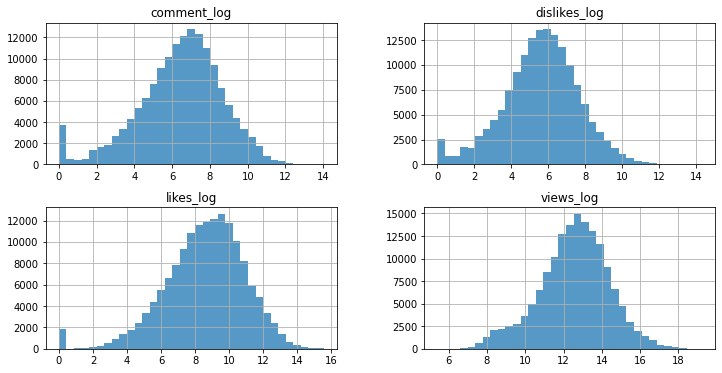

In [14]:
# Add your code here for plotting the distribution
hist = combined_data[['likes_log','views_log','dislikes_log','comment_log']].\
  hist(alpha=0.75,bins=35,figsize=(12,6))

#### 5.2.4: Comparing views, likes, dislikes against categories (3 pt)

Let us gain isights into data using various catergories, views, likes and dislikes.

Draw three plots for the following:

1.) How many videos are there for each category?

2.) What is the distribution of views against categories? (Use boxplot and views on log scale)

3.) What is the distribution of dislikes against categories? (Use boxplot and dislikes on log scale)

For extra credit:
You can try to gain more insights into the dataset by drawing interesting plots. Some ideas include:

* How long does a video trend in a country? 
* What are some videos which got popular because they were disliked? 

Think of such interesting things and add here. We will award points based on creativity of the insights that you get.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


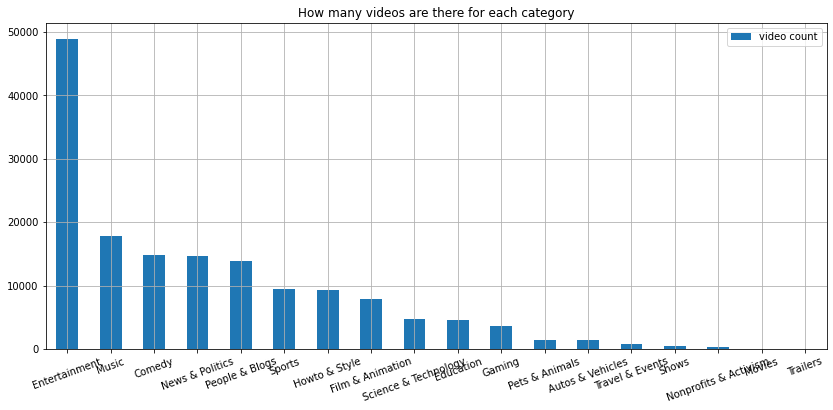

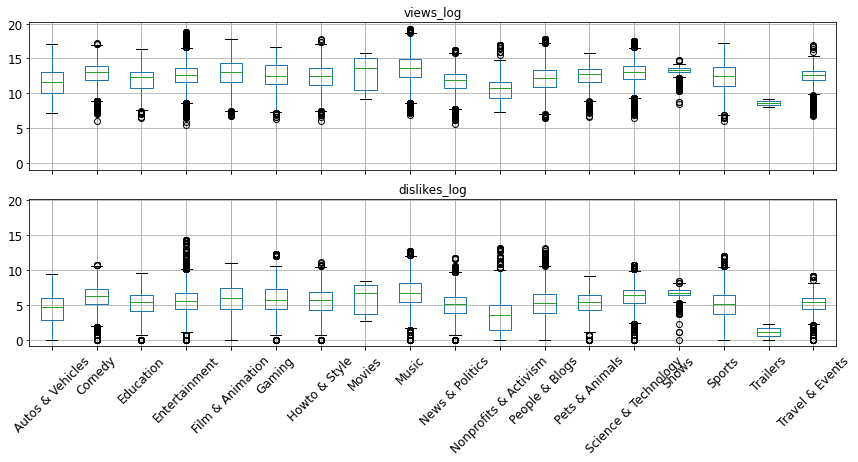

In [15]:
# Your code goes here

# Plots will be manually graded
#1 How many videos are there for each category
# group by and sort by count descending, rename the column, and plot
df_chart1 = combined_data[['category','video_id']].groupby(['category']).\
  count().reset_index().\
  sort_values(by=['video_id'],ascending=False).\
  rename(columns={'video_id':'video count'}).\
  plot(kind='bar',x='category', grid=True, \
       title= 'How many videos are there for each category',figsize=(14,6), rot=20);
plt.xlabel("")
#np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
#layout
#show the other two boxplot by subplot to share the same x-axis
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(14, 6) ,sharex=True, sharey=True)
ax1.set_title('the distribution of views against categories')
ax2.set_title('the distribution of dislikes against categories') 

#2What is the distribution of views against categories? (Use boxplot and views on log scale)
combined_data[['category','views_log']].boxplot(column=['views_log'],\
                                                      ax = ax1,\
                                                      by=['category'], rot=65, fontsize=12)
#3What is the distribution of dislikes against categories? (Use boxplot and dislikes on log scale)
combined_data[['category','dislikes_log']].boxplot(column=['dislikes_log'], \
                                                   ax = ax2,\
                                                   by=['category'], rot=45, fontsize=12)
#other detail settings
fig.suptitle("")
ax1.xaxis.label.set_visible(False)
ax2.xaxis.label.set_visible(False)
ax2.label_outer()

#### 5.2.5: Feature Engineering (8 pts)



##### a. Processing tags (1 pt)

The feature tags in the dataset has a delimiter, use that delimiter to count the number of tags, create a feature called num_tags and add that to the dataset.

In [16]:
# Add your code here
combined_data["num_tags"] = combined_data["tags"].map(lambda x: len(x.split('|'))) #tags

##### b. Processing description and title (2 pts.)

Calculate the length of description and title and add them as features to the dataset

In [ ]:
# Add your code here
combined_data["desc_len"] = combined_data["description"].map(lambda x: len(x)) #desc_len

In [19]:
# Add your code here
combined_data["len_title"] = combined_data["title"].map(lambda x: len(x)) #title_len

In [20]:
# Print cell
print('check_tags_title_description',([combined_data['num_tags'].describe(),combined_data['desc_len'].describe(),combined_data['len_title'].describe()]))

KeyError: ignored

##### c. Processing publish_time. (4 pts.)


Split 'publish_time' feature into three parts time, date, and weekday, where time will contain the time component of the original feature and date and weekday will store the corresponding date and weekday number respectively. Start with 1 for Monday and end with 7 for Sunday.

In [21]:
import random
# Add your code here
#cast from str to date
combined_data['publish_date'] = pd.to_datetime(combined_data['publish_time']).dt.date
#day on which video was published
combined_data['publish_weekday']=combined_data['publish_time'].dt.dayofweek+1 #+ 1 as it start from 0 
#execute at last
combined_data['publish_time'] = pd.to_datetime(combined_data['publish_time']).dt.time

random_index = random.randint(0,combined_data.shape[0]-1)

In [22]:
# Print cell
print('check_date_time_processing',([combined_data['publish_time'].iloc[random_index],combined_data['publish_date'].iloc[random_index],sorted(list(combined_data["publish_weekday"].value_counts()))]))

check_date_time_processing [datetime.time(1, 6, 34), datetime.date(2018, 5, 10), [18641, 18931, 22146, 22501, 22523, 23573, 26252]]


##### d. Number of videos per weekday (1 pt)

Calculate the number of videos published per day of the week. Which day of the week do people publish most videos? Make a visualization demonstrating the result.

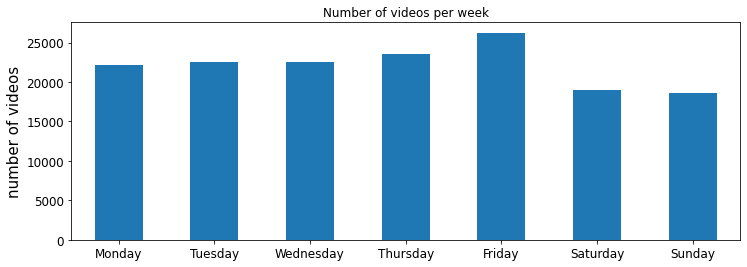

In [23]:
# Add your code for plot here
# Plots will be manually graded
#combined_data.groupby('publish_weekday').size().plot.pie(figsize=(4,4))
ax = combined_data[['publish_weekday']].\
  groupby('publish_weekday')['publish_weekday'].count().\
  plot(kind='bar', figsize=(12,4), title="Number of videos per week" ,rot=0, fontsize=12)
ax.set_alpha(0.8)
ax.set_ylabel("number of videos", fontsize=15);
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set_xlabel("");

plt.show()

#### 5.2.6: Dropping irrelevant non numeric columns (1 pt.)

Drop all the columns that are non-numeric as we have processed them and stored the information captured in them in the dataset as numbers. 

Note that a few key columns are non-numeric but should be kept in the dataframe:

comments_disabled, ratings_disabled, video_error_or_removed, country

Also drop original views, like, comments and dislikes as you have processed them as logs and stored them as separate feature. 

In [24]:
#just in case ...backup
combined_data_backup = combined_data.copy()

In [25]:
# Add your code here
#based on the above description, construst 2 list for removing from numeric and non-numeric columns.
#non numeric columns need to drop 
unused_non_numeric_list = list(set(combined_data.select_dtypes(exclude='number').columns.tolist()) - \
  set(['comments_disabled','ratings_disabled','video_error_or_removed','country','category_id'])) # is str but should be kept here ？
#numeric columns need to drop
unused_numeric_list = ['views', 'likes', 'dislikes', 'comment_count'] 
#print(drop_non_numeric_set + drop_numeric_set)
combined_data.drop(unused_non_numeric_list + unused_numeric_list, axis=1, inplace=True)

#### 5.2.7: Convert categorical features in the dataset into one hot vectors. (3 pts)

There are three categorical features remaining in the dataset, identify them and convert them into one hot vectors. Be sure that when you one hot encode, the original column is replaced.

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

combined_data.publish_weekday = combined_data.publish_weekday.astype('category')
combined_data.country = combined_data.country.astype('category')
#the third categorical column
combined_data.category_id = combined_data.country.astype('category')

# Hint: Use pd.get_dummies()range. 
#get dummies of categorical columns, concat to original dataframe with categorical columns dropped
categorical_list = ['publish_weekday','country','category_id']
combined_data = pd.concat(\
    [combined_data.drop(categorical_list, axis=1), 
     pd.get_dummies(combined_data[categorical_list])], axis=1 )


In [ ]:
# Print cell.
print('check_final_df',(combined_data.shape))

check_final_df (154567, 25)


Let's write out the modified data we created to a file so that we can reuse it in Section 2.

In [27]:
combined_data_sec_2 = combined_data.copy()
combined_data_sec_2.rename(columns = {'views_log':'label'}, inplace = True) 
combined_data_sec_2.to_csv('combined_data.csv')

#### 5.2.8: Split into x and y (1 pt)

Split the data into features and label, in this case the features are anything but views_log and the label is views_log.

In [3]:
# Add your code here
label = combined_data[['views_log']]
features = combined_data.drop(['views_log'], axis=1)

NameError: ignored

In [ ]:
# print cell
print('check_x_y_split',([features.shape, label.describe()]))

check_x_y_split [(154567, 24),            views_log
count  154567.000000
mean       12.552680
std         1.816821
min         5.411646
25%        11.469496
50%        12.655328
75%        13.761413
max        19.232552]


## 5.3 : Machine Learning using sklearn (15 pts)

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

You can find the documentation [here](https://scikit-learn.org/stable/modules/classes.html)

Now we will train some machine learning models using sklearn to predict views, rather than predicting views directly we will predict views_log to avoid numerical instability issues

### 5.3.1 : Split data into train and test (1 pt)

Use sklearn's train_test_split library and split data into train and test sets, the split should be 80-20 meaning 80% for training and rest for testing.


In [ ]:
from sklearn.model_selection import train_test_split
# Add your code here
x_train, x_test, y_train, y_test = train_test_split(\
  features, label, test_size=0.20, random_state=42)

In [ ]:
# print cell.
print('check_data_split',[x_train.shape,x_test.shape,y_train.shape,y_test.shape])

check_data_split [(123653, 24), (30914, 24), (123653, 1), (30914, 1)]


### 5.3.2: Train Machine Learning Models.

#### 5.3.2.1 Linear Regression (3 pts)

In this step we will train a linear regression model using sklearn. Train using the training data and then make predictions of test, report the mean squared error obtained on both train and test sets.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Add your code here
#create linearregression model
lr = LinearRegression()
#train model
lr.fit(x_train, y_train)
#predict
y_pred = lr.predict(x_test)

In [ ]:
print('check_lr', (np.sqrt(mean_squared_error(y_test, y_pred))))
#report the mean squared error obtained on both train and test sets
print('train MSE', mean_squared_error(y_train, lr.predict(x_train)))
print('test MSE', mean_squared_error(y_test, y_pred))


check_lr 0.6902813059539725
train MSE 0.4755407899100364
test MSE 0.4764882813495218


#### 5.3.2.2  Dimensionality reduction with PCA (6 pts)



##### Step 1: Fitting PCA and explained_variance_ratiio
Use Principal component analysis to reduce number of dimensions of the dataset, as a first step fit a pca model on your train set and then plot the explained_variance_ratio against the number of components to decide the number of components you should keep. (3 pts)

In [ ]:
#https://scikit-plot.readthedocs.io/en/stable/decomposition.html
#The scikitplot.decomposition module includes plots built specifically for 
#scikit-learn estimators that are used for dimensionality reduction
!pip install scikit-plot

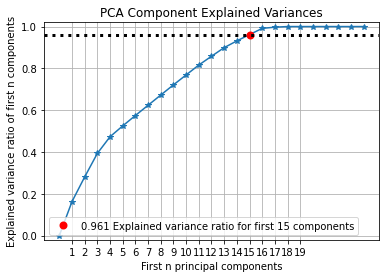

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Add your code here
scaler = StandardScaler()
#standardize 
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)
#plot 
import scikitplot as skplt
#PCA(0.95)
pca = PCA()
pca.fit(x_train_std) 
#plot the explained_variance_ratio against the number of components with target variance 0.95
ax = skplt.decomposition.plot_pca_component_variance(pca, \
                         target_explained_variance=0.95)
plt.xticks(range(1,20))
plt.show()

##### Step 2: Deciding number of components to keep
Use the plot to decide the number of components to keep, choose a number that explains atleast 95% of variance in the dataset. Then fit and transform your pca on training set using the number of components you decided. (1 pts)

**Remember that your pca should be trained on the training set (and transformed here) but only transformed on the test set.**

In [ ]:
# Add your code here
# the skplt.decomposition.plot_pca_component_variance in previous cell 
# has found the least number that explained atleast 95% variance, we can get the best value from the plot in previous
pca = PCA(n_components=15)
#optimized dataset set by PCA
x_train_pca = pca.fit_transform(x_train_std) #fit and transform the training set
x_test_pca  = pca.transform(x_test_std) #only transform the test set
#re-train the lineargression model and predict
lr.fit(x_train_pca, y_train)
y_pred = lr.predict(x_test_pca)
#assign pca to x_train
x_train = x_train_pca
x_test = x_test_pca
#!!!!!!!!!!!!!!!!!!!!!!!!!
print('check_lr', (np.sqrt(mean_squared_error(y_test, y_pred))))

check_lr 0.8087208511787096


In [ ]:
print('RMSE',mean_squared_error(y_test, y_pred, squared=False))

RMSE 0.8087208511787096


In [ ]:
# Print cell.
print('check_pca', (x_train[:50,:]))

check_pca [[-6.17339346e-01  2.71982005e+00 -5.16458317e-01 -1.20618266e+00
  -1.21672546e+00 -2.26743510e-01 -1.67061861e+00 -1.33120428e+00
  -1.21895616e+00 -1.45731573e-01 -5.95984021e-01  9.40520190e-01
  -2.67150347e-02  1.00047903e+00  2.07659298e+00]
 [-1.12834609e+00 -3.01352183e-02  2.55734233e+00  2.84705312e-01
   9.11349667e-01 -7.31707813e-01 -4.29765900e-01  2.01411952e+00
  -5.86094326e-01  3.31398272e-01 -1.11816923e+00 -7.83137702e-02
  -2.78735485e-01 -2.02944360e-01 -1.76794084e-01]
 [ 3.61395609e+00  3.19014418e+00 -8.65040551e-01  2.93611879e+00
  -5.00332255e-01  1.66550312e-01 -1.32970809e+00 -1.07364973e+00
  -1.28721675e+00 -6.33447707e-01 -6.72633565e-02  3.58875864e+00
  -1.10510974e+00 -4.47513830e+00  1.95050163e+00]
 [ 1.79821468e+00 -1.85466123e+00 -4.07153115e-01 -1.65349116e+00
   1.19839062e+00  2.10616468e+00  3.24926329e-01 -2.36081117e-01
  -8.61758121e-02  3.38139000e-01 -2.93934771e-01  8.32824007e-02
  -8.54832828e-02 -5.07317601e-01 -9.92601850

### 5.3.2.3 Random Forest. (10 pts)



##### Step 1: Hyperparameter tuning. 
Use grid search and train a random forest model on the transformed train dataset. Take a look at the sklearn `RandomForestRegressor` documentation and tune the max_depth hyperparameter using grid search. We have already tested the number of estimators hyperparameter for you. Note this section may take a while to run depending on how large your grid is. 

(Hint: refer to the GridSearchCV documentation and do some reading on how the max_depth in a RF model affects the result - while theory may help guide a rough estimate of possible hyperparameters, we can cross validate values using tools like GridSearch.

Our autograder has tiered points for this question depending on your final MSE value but is fairly generous; we are not requiring that you find the **most** optimal value for this hyperparameter but rather demonstrate understanding of grid search optimization. (4 pts)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Add your code here
# Only tune the max depth of the trees in the RF hyperparameter.
rf = RandomForestRegressor(n_estimators=140)
# depth = []
depth = [5,10,14]
nEstimator = [140]
#apply 5 fold cross validation
param_grid = {
    'max_depth': depth,
    'max_features': ['auto', 'sqrt'],
    'n_estimators': nEstimator
}
# Instantiate the grid search model
grid_searchcv = GridSearchCV(estimator = rf, param_grid = param_grid, \
                          cv = 3, n_jobs = -1)  

grid_searchcv.fit(x_train,y_train)

In [ ]:
grid_searchcv.best_params_, grid_searchcv.best_score_

##### Step 2: Fitting RF
Fit the random forest on the training data using the parameters you computed above. Then make predictions on the test set, report the root mean squared error for the test set. (3 pts)

In [ ]:
# Add your code here
# Set n_estimators = 140, max_depth = 7 (grid_searchcv.best_params_)
rf = RandomForestRegressor(n_estimators= 140, max_depth=14)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [ ]:
# Print cell
print('check_rf', (np.sqrt(mean_squared_error(y_test, y_pred))))

## Almost halfway there :)

Well done! Almost halfway there :)



# Section 2 : Distributed Machine Learning with Spark (55 Points)

Apache Spark ML is the machine learning library consisting of common learning algorithms and utilities, including classification, regression, clustering, collaborative filtering, dimensionality reduction, and underlying optimization primitives.

Why Spark ML?

Moving to the Big Data Era requires heavy iterative computations on very big datasets. Standard implementations of machine learning algorithms require very powerful machines to be able to run. Depending on high-end machines is not advantageous due to their high price and improper costs of scaling up. The idea of using distributed computing engines is to distribute the calculations to multiple low-end machines (commodity hardware) instead of a single high-end one. This definitely speeds up the learning phase and allows us to create better models.

Read more about it with the python documentation [here](https://spark.apache.org/docs/latest/ml-guide.html)

### Initializing Spark Connection - Boring setup stuff again


In [ ]:
!apt install libkrb5-dev
#!wget https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
#!tar xf spark-2.4.5-bin-hadoop2.7.tgz

!wget https://www-us.apache.org/dist/spark/spark-3.0.2/spark-3.0.2-bin-hadoop3.2.tgz
!tar xf spark-3.0.2-bin-hadoop3.2.tgz

!pip install findspark
!pip install sparkmagic
!pip install pyspark
!pip install pyspark --user
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
!pip install folium --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9
Suggested packages:
  doc-base krb5-doc krb5-user
The following NEW packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9 libkrb5-dev
0 upgraded, 7 newly installed, 0 to remove and 13 not upgraded.
Need to get 349 kB of archives.
After this operation, 1,992 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgssrpc4 amd64 1.16-2ubuntu0.2 [54.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkdb5-9 amd64 1.16-2ubuntu0.2 [37.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkadm5srv-mit11 amd64 1.16-2ubuntu0.2 [49.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkadm5

In [ ]:
!apt update
!apt install gcc python-dev libkrb5-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:15 http://se

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('CA-5').getOrCreate()


In [ ]:
%load_ext sparkmagic.magics

In [ ]:
#graph section
import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter
import pandas as pd
# NoSQL DB
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
#os.environ['SPARK_HOME'] = '/content/spark-2.4.5-bin-hadoop2.7'
os.environ['SPARK_HOME'] = '/content/spark-3.0.2-bin-hadoop3.2'

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [ ]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)

### 5.1 Data Preparation for Spark ML (20 points)

Once the spark setup ready. Next, we need the prepared data for our ML algorithms. We will use the same data you processed in Section 1 but now in spark. 

Read in the csv  into a spark dataframe. Set the "inferSchema" flag to True so that the columns are the correct datatypes and not all strings. Further, set the parameter to the first row as column headers.

In [ ]:
# Add your code here
schema = """ `id`  String, 
`comments_disabled`  Boolean, 
`ratings_disabled`  Boolean, 
`video_error_or_removed`  Boolean, 
`likes_log`  FLOAT, 
`label`  FLOAT, 
`dislikes_log`  FLOAT, 
`comment_log`  FLOAT, 
`num_tags`  INT, 
`desc_len`  INT, 
`len_title`  INT, 
`publish_weekday_1`  INT, 
`publish_weekday_2`  INT, 
`publish_weekday_3`  INT, 
`publish_weekday_4`  INT, 
`publish_weekday_5`  INT, 
`publish_weekday_6`  INT, 
`publish_weekday_7`  INT, 
`country_CA`  INT, 
`country_FR`  INT, 
`country_IN`  INT, 
`country_US`  INT,
`category_id_CA`  INT, 
`category_id_FR`  INT, 
`category_id_IN`  INT, 
`category_id_US`  INT
 """ 
train_sdf = spark.read.format("csv").option("header", "true").\
  load("/content/combined_data.csv", schema=schema)

Let us make sure everything is smooth to proceed

In [ ]:
train_sdf.show()

+---+-----------------+----------------+----------------------+---------+---------+------------+-----------+--------+--------+---------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+----------+----------+----------+----------+--------------+--------------+--------------+--------------+
| id|comments_disabled|ratings_disabled|video_error_or_removed|likes_log|    label|dislikes_log|comment_log|num_tags|desc_len|len_title|publish_weekday_1|publish_weekday_2|publish_weekday_3|publish_weekday_4|publish_weekday_5|publish_weekday_6|publish_weekday_7|country_CA|country_FR|country_IN|country_US|category_id_CA|category_id_FR|category_id_IN|category_id_US|
+---+-----------------+----------------+----------------------+---------+---------+------------+-----------+--------+--------+---------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+----

Print out the dataframe schema and verify the datatypes

In [ ]:
#Task: Print the dataframe schema and verify
# Add your code here
train_sdf.printSchema()

root
 |-- id: string (nullable = true)
 |-- comments_disabled: boolean (nullable = true)
 |-- ratings_disabled: boolean (nullable = true)
 |-- video_error_or_removed: boolean (nullable = true)
 |-- likes_log: float (nullable = true)
 |-- label: float (nullable = true)
 |-- dislikes_log: float (nullable = true)
 |-- comment_log: float (nullable = true)
 |-- num_tags: integer (nullable = true)
 |-- desc_len: integer (nullable = true)
 |-- len_title: integer (nullable = true)
 |-- publish_weekday_1: integer (nullable = true)
 |-- publish_weekday_2: integer (nullable = true)
 |-- publish_weekday_3: integer (nullable = true)
 |-- publish_weekday_4: integer (nullable = true)
 |-- publish_weekday_5: integer (nullable = true)
 |-- publish_weekday_6: integer (nullable = true)
 |-- publish_weekday_7: integer (nullable = true)
 |-- country_CA: integer (nullable = true)
 |-- country_FR: integer (nullable = true)
 |-- country_IN: integer (nullable = true)
 |-- country_US: integer (nullable = true)


Now, we have the processed data in hand. Next for the Spark ML, we need to create a feature column that has all features concatenated and a single column for labels.

You can use VectorAssembler() to create a feature vector from all categorical and numerical features. Let us call the call the final vector as “features”.

Now, list all columns in the data and store it in a list named 'all_columns'


In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [ ]:
# Add your code here
all_columns = [
'id',
'comments_disabled',
'ratings_disabled',
'video_error_or_removed',
'likes_log',
'label',
'dislikes_log',
'comment_log',
'num_tags',
'desc_len',
'len_title',
'publish_weekday_1',
'publish_weekday_2',
'publish_weekday_3',
'publish_weekday_4',
'publish_weekday_5',
'publish_weekday_6',
'publish_weekday_7',
'country_CA',
'country_FR',
'country_IN',
'country_US',
'category_id_CA', 
'category_id_FR', 
'category_id_IN', 
'category_id_US'
]# Task

Now create a list of columns which you don't wan't to include in your features, i.e., the labels and probably other columns which are not useful for the machine learning model. Let us call this list drop_columns.

In [ ]:
# Add your code here
drop_columns = ['id','label'\
#                ,'dislikes_log', 'country_IN','category_id_FR','category_id_CA'\
#                ,'category_id_US','ratings_disabled','comment_log'\
                ]# Task

In [ ]:
columns_to_use = [i for i in all_columns if i not in drop_columns]

''

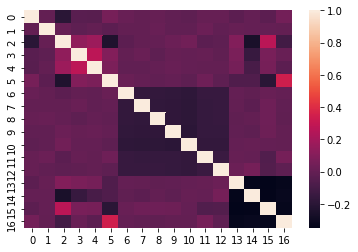

In [ ]:
#for selection of unuseful columns
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=columns_to_use, 
                            outputCol=vector_col)
train_sdf_vector = assembler.transform(train_sdf).select(vector_col)
arr_features = train_sdf_vector.rdd.map(lambda row: row['corr_features'].toArray())
pearson_corr = Statistics.corr(arr_features, method='pearson')
sns.heatmap(pearson_corr)
columns_to_use
""""""

Now create a VectorAssembler object with columns you want to use for the ML models. Let us Name the output column as 'features'. These are the features that you will use later.  Let us name the vector assembler object 'assembler'

In [ ]:
# Add your code
features = "features" 
assembler = VectorAssembler(inputCols = columns_to_use, outputCol = features)

In [ ]:
# Print assember stats
print('stat_assembler', (str(assembler.params), columns_to_use))

stat_assembler ('[Param(parent=\'VectorAssembler_69db27c8f386\', name=\'handleInvalid\', doc="How to handle invalid data (NULL and NaN values). Options are \'skip\' (filter out rows with invalid data), \'error\' (throw an error), or \'keep\' (return relevant number of NaN in the output). Column lengths are taken from the size of ML Attribute Group, which can be set using `VectorSizeHint` in a pipeline before `VectorAssembler`. Column lengths can also be inferred from first rows of the data since it is safe to do so but only in case of \'error\' or \'skip\')."), Param(parent=\'VectorAssembler_69db27c8f386\', name=\'inputCols\', doc=\'input column names.\'), Param(parent=\'VectorAssembler_69db27c8f386\', name=\'outputCol\', doc=\'output column name.\')]', ['comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'likes_log', 'dislikes_log', 'comment_log', 'num_tags', 'desc_len', 'len_title', 'publish_weekday_1', 'publish_weekday_2', 'publish_weekday_3', 'publish_weekday_4', 'pu

Now, we are ready to create a pipeline with different stages.  For out data so far, we just a single stage with the assember, however, you could have other stages  before that where you perform operations on the data, e.g, transforming categorical strings to numeric values or feature scaling operations.

In this step, we will create a pipeline with a single stage - the assembler. Fit the pipeline to your data and create the transformed dataframe and name it 'modified_data_sdf'.

In [ ]:
from pyspark.ml import Pipeline
# Add your code here
# pipeline
modified_data_sdf = Pipeline(stages=[assembler]).fit(train_sdf).transform(train_sdf)

In [ ]:
#Print results
pipeline_stat = pd.DataFrame(modified_data_sdf.take(5), columns=modified_data_sdf.columns)
print('check_pipeline', (pipeline_stat.columns.values, pipeline_stat['features'][0].size))

check_pipeline (array(['id', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'likes_log', 'label', 'dislikes_log',
       'comment_log', 'num_tags', 'desc_len', 'len_title',
       'publish_weekday_1', 'publish_weekday_2', 'publish_weekday_3',
       'publish_weekday_4', 'publish_weekday_5', 'publish_weekday_6',
       'publish_weekday_7', 'country_CA', 'country_FR', 'country_IN',
       'country_US', 'category_id_CA', 'category_id_FR', 'category_id_IN',
       'category_id_US', 'features'], dtype=object), 24)


Now that we have the required data in the right format, Let us create our train and test sets. Let us, split into an 80-20 ratio between the train and test sets. Name these 'train_sdf' and 'test_sdf'

In [ ]:
# Add your code here
#split into an 80-20 ratio between the train and test sets
train_sdf, test_sdf = modified_data_sdf.randomSplit([0.8, 0.2], seed=42)

In [ ]:
#Print results here
print('check_split', (train_sdf.count(), test_sdf.count()))

check_split (123604, 30963)


### 5.2 Linear regression using Spark ML (15 points)

In this section, train s linear regression model to our data and predict the views. This prediction should be based on "Big" data tools, i.e., Spark ML's linear regression. Create a model using this library, fit the training data. 
Afterwards, print the summary stats of the model, i.e, 
- the RMSE error, R2 score and any other information you find useful. Refere the Spark ML documentation online for the implementation.

In this section, we will train the model without any regularization!

In [ ]:
from pyspark.ml.regression import LinearRegression
#without any regularization
lr = LinearRegression(featuresCol = 'features', \
                      labelCol='label')
lr_model = lr.fit(train_sdf)

In [ ]:
trainingSum = lr_model.summary
print("RMSE: %f" % trainingSum.rootMeanSquaredError)
print("r2: %f" % trainingSum.r2)

RMSE: 0.690265
r2: 0.856305


Let us investigate that if the model actually overfits the training data. 

Predict the views for your test data (Note: it is called 'transform' in spark ml). Evaluate the performance using 'RegressionEvaluator' in the Spark ML Regression library. Name prediction column as 'prediction'.

In [ ]:
# Add your code here
from pyspark.ml.evaluation import RegressionEvaluator
predictions = lr_model.transform(test_sdf)

In [294]:
from pyspark.ml.evaluation import RegressionEvaluator

# Task: Compute RMSr on the test set
#http://spark.apache.org/docs/latest/api/python/pyspark.ml.html
evaluator = RegressionEvaluator(labelCol="label",
                                predictionCol="prediction",
                                metricName="rmse")
test_rmse_orig = evaluator.evaluate(predictions)
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

In [297]:
#Print results here
predictions_to_print = predictions.toPandas()
#lranswer = [test_rmse_orig, predictions_to_print['prediction'][0:50], predictions_to_print['label'][0:50]]
#print('result_lr_test', lranswer)
print('test_rmse_orig=', test_rmse_orig, 'r2=', r2)
predictions_to_print[['prediction','label']].head(50)

test_rmse_orig= 0.6876425455213748 r2= 0.8540988971905475


,prediction,label
0,16.700884,16.658009
1,10.895125,11.306860
2,15.593000,15.438502
3,14.533856,15.364674
4,16.487317,16.040981
5,13.367362,13.639235
6,12.834597,12.830550
7,12.932164,12.971131
8,15.431670,16.095770
9,15.493636,14.900380


Next, we will implement regularization to avoid overfitting. you can try different  regularization parameters, e.g., try LASSO (L1), Ridge (L2) and elastic net (combination of L1 and L2).

You can try different regularization hyperparameters to initialize three different regularized linear regression models. Compare these regularization methods with each other and the non-regularized method above.


In [258]:
""" find the best parameters
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
# We use a ParamGridBuilder to construct a grid of parameters to search over.
# TrainValidationSplit will try all combinations of values and determine best model using
# the evaluator.
paramGrid = ParamGridBuilder()\
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .addGrid(lr.fitIntercept, [False, True])\
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])\
    .build()

# In this case the estimator is simply the linear regression.
# A TrainValidationSplit requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
tvs = TrainValidationSplit(estimator=lr,
                           estimatorParamMaps=paramGrid,
                           evaluator=RegressionEvaluator(),
                           trainRatio=0.8)

# Run TrainValidationSplit, and choose the best set of parameters.
model = tvs.fit(train_sdf)

# Make predictions on test data. model is the model with combination of parameters
# that performed best.
model.transform(test_sdf).select("features", "label", "prediction").show()
#best parameters
model.bestModel.extractParamMap()
"""

' find the best parameters\nfrom pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit\n# We use a ParamGridBuilder to construct a grid of parameters to search over.\n# TrainValidationSplit will try all combinations of values and determine best model using\n# the evaluator.\nparamGrid = ParamGridBuilder()    .addGrid(lr.regParam, [0.1, 0.01])     .addGrid(lr.fitIntercept, [False, True])    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])    .build()\n\n# In this case the estimator is simply the linear regression.\n# A TrainValidationSplit requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.\ntvs = TrainValidationSplit(estimator=lr,\n                           estimatorParamMaps=paramGrid,\n                           evaluator=RegressionEvaluator(),\n                           trainRatio=0.8)\n\n# Run TrainValidationSplit, and choose the best set of parameters.\nmodel = tvs.fit(train_sdf)\n\n# Make predictions on test data. model is the model with combination of

In [305]:
# Add your code here
# Compute predictions using each of the models
#train models
lr_model_l1 = LinearRegression(featuresCol = 'features', \
                      labelCol='label', \
                      regParam=0.3, \
                      elasticNetParam=1).fit(train_sdf) 
lr_model_l2 = LinearRegression(featuresCol = 'features', \
                      labelCol='label', \
                      regParam=0.3, \
                      elasticNetParam=0).fit(train_sdf)        
lr_model_elastic = LinearRegression(featuresCol = 'features', \
                      labelCol='label', \
                      regParam=0.4, \
                      elasticNetParam=1).fit(train_sdf)                                        

l1_predictions = lr_model_l1.transform(test_sdf)
l2_predictions = lr_model_l2.transform(test_sdf)
elastic_net_predictions = lr_model_elastic.transform(test_sdf)

# Task: Calculate the root mean squared error (RMSE) on test set for each of your models
test_rmse_l1 =  evaluator.evaluate(l1_predictions)
test_rmse_l2 = evaluator.evaluate(l2_predictions)
test_rmse_elastic = evaluator.evaluate(elastic_net_predictions)

In [307]:
# Print your results here
result = [test_rmse_l1, test_rmse_l2, test_rmse_elastic]
print('result_lr_all', result)
print('result_r2_all',[lr_model_l1.summary.r2, lr_model_l2.summary.r2, lr_model_elastic.summary.r2])

result_lr_all [0.9067078735004659, 0.7330043576739029, 0.9564650082408391]
result_r2_all [0.7519344592478676, 0.8384495972262032, 0.7226206298522346]


### 5.3 Random Forest Regression 10 pts)

You need an understanding of random forest and its variations,i.e., boosted trees to succeed as a data scientist. These are ensemble methods that are know for generalization and are considered popular for classification and regression problems. Similar to linear regresssion, create a random forest regressor model. After it, train the model using the data and then evaluate its performance using the test data. Finally, compare performance of random forest model with the linear regression model.



In [ ]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer

# Add your code here
rf_model = RandomForestRegressor( featuresCol="features",maxDepth =5).\
  fit(train_sdf)

In [ ]:
# Add code here to calculate predictions
predictions = rf_model.transform(test_sdf) #Task : Calculate predictions on the test set
train_predictions = rf_model.transform(train_sdf)

In [ ]:
predictions.select("prediction", "label", "features").printSchema()
train_predictions.select("prediction", "label", "features").printSchema()

root
 |-- prediction: double (nullable = false)
 |-- label: float (nullable = true)
 |-- features: vector (nullable = true)

root
 |-- prediction: double (nullable = false)
 |-- label: float (nullable = true)
 |-- features: vector (nullable = true)



In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")

# Add your code here to instatiate a regressionevaluator 
train_rmse_rf = evaluator.evaluate(train_predictions) #Task: Compute the training RMSE
rmse_rf = evaluator.evaluate(predictions)#Task: Compute RMSE using the test set

In [ ]:
#Print results of predictions here
predictions_to_reveal = predictions.toPandas()
answer = [train_rmse_rf, predictions_to_reveal['prediction'][0:50], predictions_to_reveal['label'][0:50], rmse_rf]
print('check_rf_spark', answer)

check_rf_spark [0.7315385537221658, 0     15.746731
1     11.005602
2     15.349733
3     14.823933
4     15.273425
5     12.994685
6     13.061997
7     12.886061
8     15.382764
9     15.906493
10    12.203462
11    15.241095
12    11.610951
13    13.420201
14    11.786702
15    12.674864
16    13.110586
17    14.380897
18    12.803660
19    12.888494
20    12.857787
21    12.729685
22    12.777226
23    12.525406
24    13.802546
25    12.885936
26    13.672340
27    10.149921
28    12.484468
29    10.879086
30    12.532625
31    11.919795
32    12.219941
33    11.615349
34    12.471171
35    12.237154
36    12.181425
37    13.485521
38    12.047888
39    11.791054
40    12.036616
41    13.900677
42    13.729460
43    11.634682
44    15.033739
45    12.245800
46    14.133520
47    14.647253
48    12.578733
49    12.639330
Name: prediction, dtype: float64, 0     16.658009
1     11.306860
2     15.438502
3     15.364674
4     16.040981
5     13.639235
6     12.830550
7     12.971131
8 

### 5.4 Dimensionality Reduction using Principal Component Analysis (10pt)

The focus of this section is to utilize PCA to further reduce the dimensions of data, i.e., a lower dimensional space. After PCA perform linear regression on the new data. You can select a suitable value for the number of dimensions as calculated in previous section.

The steps are illustrated below:
1.   Initialization of PCA model
2.   Fit the PCA model using the training data
3.   Extract the PCA feature from the trained PCA model from step 2
4.   Train a linear regression model using the retreived PCA features
5.   Evaluate the trained model 's performance on the test set 

This section requires extra effort and therefore has less starter code. Spen time to understand and implement considering yourself a data scientist working on an assigned task.






In [ ]:
# Add your code for the PCA model and training here
from pyspark.ml.feature import PCA
pca_of_model = PCA(k=15,inputCol="features",outputCol="pcaFeatures").fit(train_sdf)

train_rmse_pca_model = pca_of_model.transform(train_sdf) 

ModuleNotFoundError: ignored

In [ ]:
# Add your code here
predictions = train_rmse_pca_model.predict(test_sdf) #Task: Retreive predictions on the test set

test_rmse_pca_model = pca_of_model.transform(test_sdf) #Task: Retreive RMSE for test data


AttributeError: ignored

In [ ]:
# Add your code here
predictions_to_grade = predictions.toPandas()
answer = [training_rmse_pca, predictions_to_grade['prediction'][0:50], predictions_to_grade['label'][0:50], test_rmse_pca]
print('check_pca_spark', answer)

# Submission

**Submission on the blackboard**. 
** PDF submission for the simalarity check and .ipynb for original submission **

Go to the "File" tab at the top left, and click "Download .ipynb". Submit under 'scalableMachinelearning.ipynb'.

You must submit your notebook to blackboard for the grading.